In [59]:
# from google.colab import drive
# drive.mount('/content/drive')

In [60]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [61]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'Augmented Images',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 6496 files belonging to 6 classes.


In [62]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'Validation Set',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1624 files belonging to 6 classes.


In [63]:
validation_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 6), dtype=tf.float32, name=None))>

In [64]:
cnn = tf.keras.models.Sequential()

In [65]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [66]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [67]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [68]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [69]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [70]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [71]:
cnn.add(tf.keras.layers.Flatten())

In [72]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [73]:
cnn.add(tf.keras.layers.Dropout(0.4))

In [74]:
cnn.add(tf.keras.layers.Dense(units=6,activation='softmax'))

In [75]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [76]:
cnn.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 6)              │         9,006 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,794,730 (29.73 MB)

 Trainable params: 7,794,730 (29.73 MB)

 Non-trainable params: 0 (0.00 B)

In [77]:
training_history = cnn.fit(x=training_set, validation_data=validation_set, epochs=5)

Epoch 1/5
203/203 ━━━━━━━━━━━━━━━━━━━━ 124s 587ms/step - accuracy: 0.4784 - loss: 1.2768 - val_accuracy: 0.9261 - val_loss: 0.2098
Epoch 2/5
203/203 ━━━━━━━━━━━━━━━━━━━━ 112s 549ms/step - accuracy: 0.9354 - loss: 0.1901 - val_accuracy: 0.9815 - val_loss: 0.0721
Epoch 3/5
203/203 ━━━━━━━━━━━━━━━━━━━━ 115s 566ms/step - accuracy: 0.9718 - loss: 0.0952 - val_accuracy: 0.9667 - val_loss: 0.1006
Epoch 4/5
203/203 ━━━━━━━━━━━━━━━━━━━━ 117s 577ms/step - accuracy: 0.9865 - loss: 0.0478 - val_accuracy: 0.9945 - val_loss: 0.0237
Epoch 5/5
203/203 ━━━━━━━━━━━━━━━━━━━━ 115s 567ms/step - accuracy: 0.9894 - loss: 0.0357 - val_accuracy: 0.9932 - val_loss: 0.0218


In [78]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

203/203 ━━━━━━━━━━━━━━━━━━━━ 27s 131ms/step - accuracy: 0.9986 - loss: 0.0063
Training accuracy: 0.9986145496368408


In [79]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

51/51 ━━━━━━━━━━━━━━━━━━━━ 7s 127ms/step - accuracy: 0.9924 - loss: 0.0239
Validation accuracy: 0.9932265877723694


In [80]:
cnn.save('trained_plant_model.keras')

In [81]:
training_history.history

{'accuracy': [0.6765701770782471,
  0.9550492763519287,
  0.9645935893058777,
  0.9899938702583313,
  0.9856835007667542],
 'loss': [0.8152878284454346,
  0.13475264608860016,
  0.12535186111927032,
  0.03549189865589142,
  0.04834712669253349],
 'val_accuracy': [0.9261083602905273,
  0.9815270900726318,
  0.9667487740516663,
  0.9944581389427185,
  0.9932265877723694],
 'val_loss': [0.20983737707138062,
  0.07214493304491043,
  0.10055537521839142,
  0.023733200505375862,
  0.021809106692671776]}

In [82]:
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [83]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


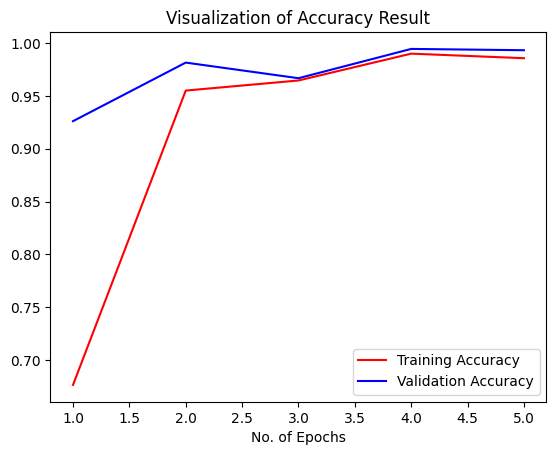

In [84]:
import json
import matplotlib.pyplot as plt

with open('training_hist.json', 'r') as file:
    training_history = json.load(file)

epochs = [i for i in range(1,6)]
plt.plot(epochs,training_history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()


In [85]:
class_name = validation_set.class_names
# class_name = ['Arjun Leaf','Curry Leaf','marsh Pennywort Leaf','Mint Leaf','Neem Leaf','Rubble Leaf']
class_name

['Arjun Leaf',
 'Curry Leaf',
 'Marsh Pennywort Leaf',
 'Mint Leaf',
 'Neem Leaf',
 'Rubble Leaf']

In [86]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'Test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 33 files belonging to 6 classes.


In [87]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


In [88]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [89]:
Y_true

<tf.Tensor: shape=(33,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5], dtype=int64)>

In [90]:
predicted_categories

<tf.Tensor: shape=(33,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 1,
       3, 4, 4, 4, 4, 4, 5, 5, 5, 0, 5], dtype=int64)>

In [91]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [92]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                      precision    recall  f1-score   support

          Arjun Leaf       0.86      1.00      0.92         6
          Curry Leaf       0.86      1.00      0.92         6
Marsh Pennywort Leaf       1.00      1.00      1.00         6
           Mint Leaf       1.00      0.80      0.89         5
           Neem Leaf       1.00      1.00      1.00         5
         Rubble Leaf       1.00      0.80      0.89         5

            accuracy                           0.94        33
           macro avg       0.95      0.93      0.94        33
        weighted avg       0.95      0.94      0.94        33



In [93]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                      precision    recall  f1-score   support

          Arjun Leaf       0.86      1.00      0.92         6
          Curry Leaf       0.86      1.00      0.92         6
Marsh Pennywort Leaf       1.00      1.00      1.00         6
           Mint Leaf       1.00      0.80      0.89         5
           Neem Leaf       1.00      1.00      1.00         5
         Rubble Leaf       1.00      0.80      0.89         5

            accuracy                           0.94        33
           macro avg       0.95      0.93      0.94        33
        weighted avg       0.95      0.94      0.94        33



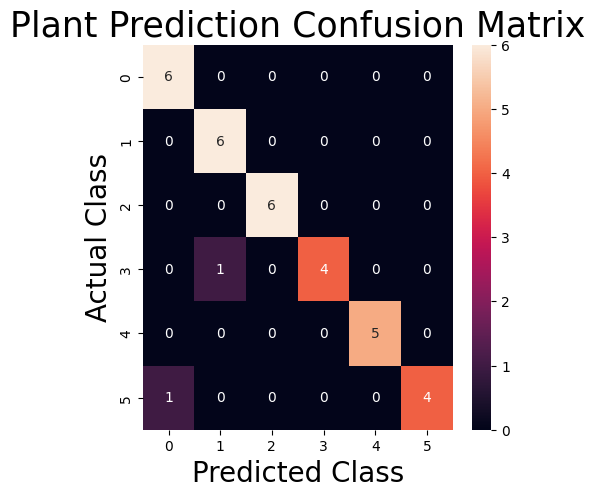

In [96]:

plt.figure(figsize=(5, 5))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Prediction Confusion Matrix',fontsize = 25)
plt.show()